In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df=pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
#QUESTION1

#Region Specific reports on Revenue
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y/%m')
df
df['Revenue']=df['Quantity']*df['UnitPrice']
df.Revenue.sum()
df1=df.groupby('Country')['Revenue'].sum()
df1=df1.reset_index()
print(df1)

                 Country       Revenue
0              Australia  1.370773e+05
1                Austria  1.015432e+04
2                Bahrain  5.484000e+02
3                Belgium  4.091096e+04
4                 Brazil  1.143600e+03
5                 Canada  3.666380e+03
6        Channel Islands  2.008629e+04
7                 Cyprus  1.294629e+04
8         Czech Republic  7.077200e+02
9                Denmark  1.876814e+04
10                  EIRE  2.632768e+05
11    European Community  1.291750e+03
12               Finland  2.232674e+04
13                France  1.974039e+05
14               Germany  2.216982e+05
15                Greece  4.710520e+03
16             Hong Kong  1.011704e+04
17               Iceland  4.310000e+03
18                Israel  7.907820e+03
19                 Italy  1.689051e+04
20                 Japan  3.534062e+04
21               Lebanon  1.693880e+03
22             Lithuania  1.661060e+03
23                 Malta  2.505470e+03
24           Netherlands 

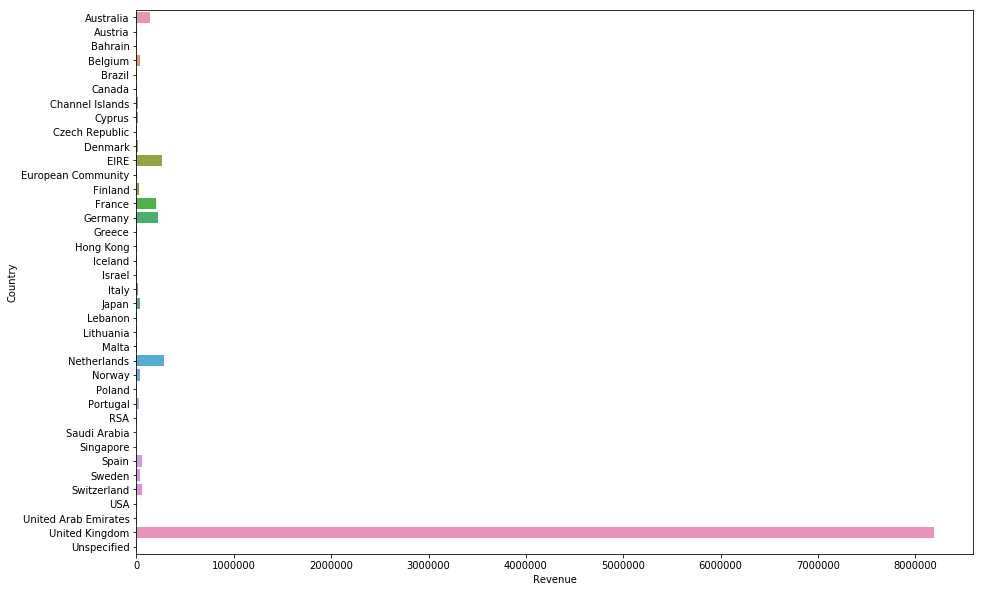

In [3]:
plt.figure(figsize=(15,10))
sns.barplot(y="Country",x="Revenue",data=df1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

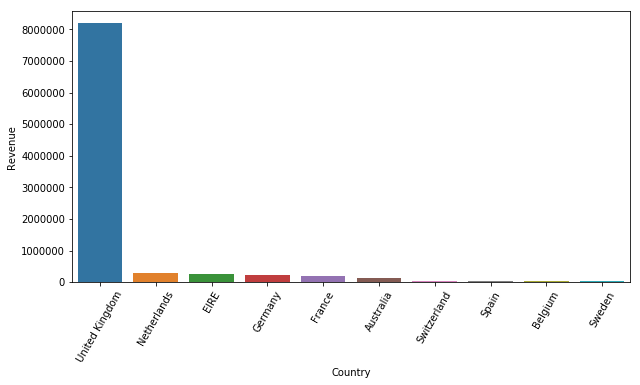

In [59]:
#Revenue Trend of top 10 Countries
ax=df1.sort_values(by=['Revenue'],ascending=False)
df2=ax.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x="Country",y="Revenue",data=df2)
plt.xticks(rotation='60')

In [5]:
df1.to_csv('RevenueReport.csv')

In [6]:
#QUESTION 2

#Individual Product Earnings
product_revenue=df.groupby(['StockCode','Description'])['Revenue'].sum()

product_revenue=product_revenue[product_revenue>0]
product_revenue=product_revenue.reset_index()
product_revenue

,StockCode,Description,Revenue
0,10002,INFLATABLE POLITICAL GLOBE,759.890
1,10080,GROOVY CACTUS INFLATABLE,119.090
2,10120,DOGGY RUBBER,40.530
3,10125,MINI FUNKY DESIGN TAPES,994.840
4,10133,COLOURING PENCILS BROWN TUBE,1540.020
5,10135,COLOURING PENCILS BROWN TUBE,2206.140
6,11001,ASSTD DESIGN RACING CAR PEN,2152.390
7,15030,FAN BLACK FRAME,41.470
8,15034,PAPER POCKET TRAVELING FAN,731.730
9,15036,ASSORTED COLOURS SILK FAN,18064.160


In [7]:
#QUESTION 3

#top performing products
bx=product_revenue.sort_values(by=['Revenue'],ascending=False)
bx 

,StockCode,Description,Revenue
4138,DOT,DOTCOM POSTAGE,206245.480
1258,22423,REGENCY CAKESTAND 3 TIER,164762.190
2663,47566,PARTY BUNTING,98302.980
3764,85123A,WHITE HANGING HEART T-LIGHT HOLDER,97715.990
3752,85099B,JUMBO BAG RED RETROSPOT,92356.030
1947,23084,RABBIT NIGHT LIGHT,66756.590
4140,POST,POSTAGE,66230.640
940,22086,PAPER CHAIN KIT 50'S CHRISTMAS,63791.940
2869,84879,ASSORTED COLOUR BIRD ORNAMENT,58959.730
2731,79321,CHILLI LIGHTS,53768.060


In [8]:
#top 20 best performing products 
b=bx.head(25)
b

,StockCode,Description,Revenue
4138,DOT,DOTCOM POSTAGE,206245.48
1258,22423,REGENCY CAKESTAND 3 TIER,164762.19
2663,47566,PARTY BUNTING,98302.98
3764,85123A,WHITE HANGING HEART T-LIGHT HOLDER,97715.99
3752,85099B,JUMBO BAG RED RETROSPOT,92356.03
1947,23084,RABBIT NIGHT LIGHT,66756.59
4140,POST,POSTAGE,66230.64
940,22086,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
2869,84879,ASSORTED COLOUR BIRD ORNAMENT,58959.73
2731,79321,CHILLI LIGHTS,53768.06


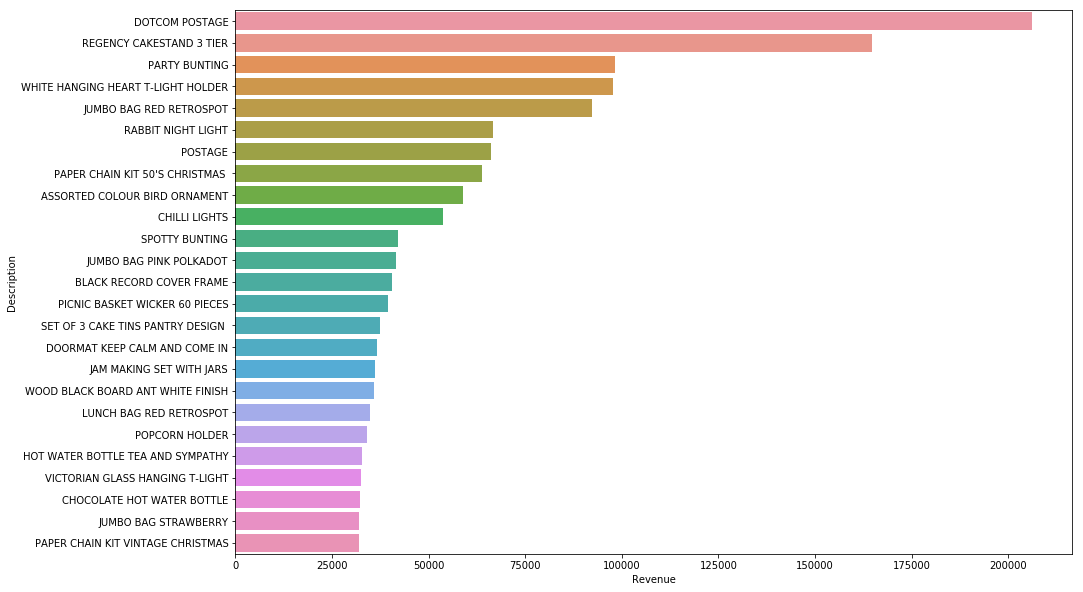

In [9]:
#Plot Products vs revenue
plt.figure(figsize=(15,10))
g=sns.barplot(y="Description",x="Revenue",data=b)

In [10]:
#QUESTION 4

#10 products customer ignore
i=product_revenue.sort_values(by=['Revenue'],ascending=True)
i.head(10)

,StockCode,Description,Revenue
4139,PADS,PADS TO MATCH ALL CUSHIONS,0.003
2769,84227,HEN HOUSE W CHICK IN NEST,0.420
2275,23366,SET 12 COLOURING PENCILS DOILEY,0.650
2912,85047,WHITE BEADED GARLAND STRING 20LIGHT,0.800
3311,51014c,"FEATHER PEN,COAL BLACK",0.830
408,21268,VINTAGE BLUE TINSEL REEL,0.840
3015,90084,PINK CRYSTAL GUITAR PHONE CHARM,0.850
3435,84201C,HAPPY BIRTHDAY CARD TEDDY/CAKE,0.950
3437,84206B,CAT WITH SUNGLASSES BLANK CARD,0.950
2713,72815,3 WICK CHRISTMAS BRIAR CANDLE,0.970


In [11]:
df3=df.groupby('InvoiceDate')['Revenue'].sum()
df3=df3.reset_index()
df3

,InvoiceDate,Revenue
0,2010/12,748957.020
1,2011/01,560000.260
2,2011/02,498062.650
3,2011/03,683267.080
4,2011/04,493207.121
5,2011/05,723333.510
6,2011/06,691123.120
7,2011/07,681300.111
8,2011/08,682680.510
9,2011/09,1019687.622


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

<Figure size 13320x4320 with 0 Axes>

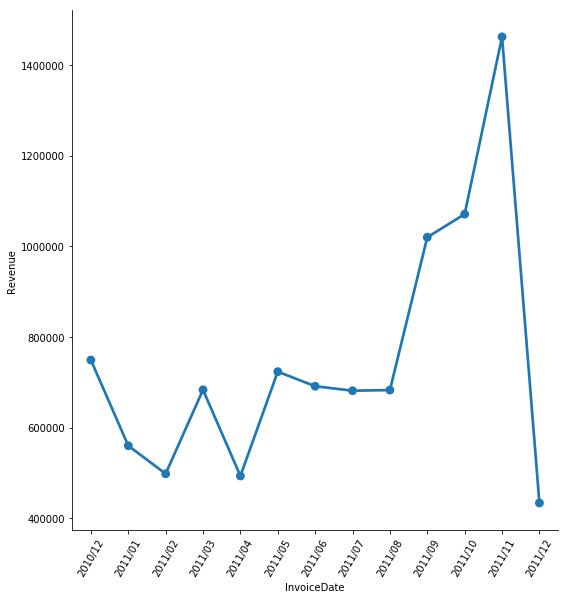

In [12]:
#QUESTION 5

#Revenue trend in different time span
plt.figure(figsize=(185,60))
fy=sns.factorplot(x="InvoiceDate",y="Revenue",data=df3,size=8)
plt.xticks(rotation='60')

In [13]:
#RFM ANALYSIS

dfn1=df.copy()
dfn=dfn1.dropna(axis=0,subset=['CustomerID'],inplace=False)
dfn['InvoiceDate']=pd.to_datetime(dfn['InvoiceDate']).dt.strftime('%Y-%m-%d')
dfn.info()

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
Revenue        406829 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [14]:
dfn['InvoiceDate'].max()
now = dt.date(2011,12,10)
now=pd.to_datetime(now)
print(now)

2011-12-10 00:00:00


In [63]:
dfn['InvoiceDate']=pd.to_datetime(dfn['InvoiceDate'])
dfn['Recency'] =(now-dfn['InvoiceDate']).dt.days
dfn.head(10)

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,374
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850.0,United Kingdom,15.30,374
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850.0,United Kingdom,25.50,374
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850.0,United Kingdom,11.10,374
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850.0,United Kingdom,11.10,374
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047.0,United Kingdom,54.08,374


In [62]:
#Recency
recency= dfn.groupby(by='CustomerID', as_index=False)['Recency'].min()
recency.columns = ['CustomerID','recency']
recency.sort_values(by=['recency'],ascending=True)
recency.head()

,CustomerID,recency
0,12346.0,343
1,12347.0,9
2,12348.0,100
3,12349.0,39
4,12350.0,312


In [61]:
dfn_copy = dfn.copy()
dfn_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#Frequency of purchases
frequency = dfn_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.sort_values(by=['Frequency'],ascending=False)
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [60]:
#Monetary
dfn['Revenue']=dfn['Quantity']*dfn['UnitPrice']
monetary= dfn.groupby('CustomerID')['Revenue'].sum()
monetary=monetary.reset_index()
monetary.head()

C:\Users\gokul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CustomerID,Revenue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [64]:
#Merging Recency,Frequency and Monetary
temp= recency.merge(frequency,on='CustomerID')
rfm = temp.merge(monetary,on='CustomerID')

In [65]:
#CustomerID as index
rfm=rfm.set_index('CustomerID')
rfm.head(10)

,recency,Frequency,Revenue
CustomerID,,,
12346.0,343,2,0.00
12347.0,9,7,4310.00
12348.0,100,4,1797.24
12349.0,39,1,1757.55
12350.0,312,1,334.40
12352.0,39,11,1545.41
12353.0,223,1,89.00
12354.0,253,1,1079.40
12355.0,223,1,459.40


In [66]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles
quantiles.to_dict()

{'recency': {0.25: 39.0, 0.5: 70.0, 0.75: 162.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Revenue': {0.25: 293.36250000000007,
  0.5: 648.0750000000002,
  0.75: 1611.7249999999995}}

In [67]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1  

In [68]:
seg_rfm = rfm.copy()
seg_rfm['Rscore'] = seg_rfm['recency'].apply(RScore, args=('recency',quantiles,))
seg_rfm['FScore'] = seg_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
seg_rfm['MScore'] = seg_rfm['Revenue'].apply(FMScore, args=('Revenue',quantiles,))
seg_rfm.head()

,recency,Frequency,Revenue,Rscore,FScore,MScore
CustomerID,,,,,,
12346.0,343,2,0.00,4,3,4
12347.0,9,7,4310.00,1,1,1
12348.0,100,4,1797.24,3,2,1
12349.0,39,1,1757.55,1,4,1
12350.0,312,1,334.40,4,4,3


In [69]:
seg_rfm['RFMScore'] = seg_rfm.Rscore.map(str) + seg_rfm.FScore.map(str) + seg_rfm.MScore.map(str)
seg_rfm.sort_values(by='RFMScore')
seg_rfm.head()

,recency,Frequency,Revenue,Rscore,FScore,MScore,RFMScore
CustomerID,,,,,,,
12346.0,343,2,0.00,4,3,4,434
12347.0,9,7,4310.00,1,1,1,111
12348.0,100,4,1797.24,3,2,1,321
12349.0,39,1,1757.55,1,4,1,141
12350.0,312,1,334.40,4,4,3,443


In [25]:
#QUESTION 6

#Loyal Customers
seg_rfm[seg_rfm['FScore']==1].sort_values('Frequency', ascending=False).head(30)

,recency,Frequency,Revenue,Rscore,FScore,MScore,RFMScore
CustomerID,,,,,,,
14911.0,9,248,132572.62,1,1,1,111
12748.0,9,224,29072.10,1,1,1,111
17841.0,9,169,40340.78,1,1,1,111
14606.0,9,128,11713.85,1,1,1,111
15311.0,9,118,59419.34,1,1,1,111
13089.0,9,118,57385.88,1,1,1,111
12971.0,9,89,10930.26,1,1,1,111
14527.0,9,86,7711.38,1,1,1,111
13408.0,9,81,27487.41,1,1,1,111


In [26]:
#QUESTION 7
print("Best Customers: ",len(seg_rfm[seg_rfm['RFMScore']=='111']))
print('Loyal Customers: ',len(seg_rfm[seg_rfm['FScore']==1]))
print("Big Spenders: ",len(seg_rfm[seg_rfm['MScore']==1]))
print('Almost Lost: ', len(seg_rfm[seg_rfm['RFMScore']=='433']))
print('Lost Customers: ',len(seg_rfm[seg_rfm['RFMScore']=='411']))
print('Lost Cheap Customers: ',len(seg_rfm[seg_rfm['RFMScore']=='344']))

Best Customers:  675
Loyal Customers:  1087
Big Spenders:  1093
Almost Lost:  131
Lost Customers:  10
Lost Cheap Customers:  125


In [27]:
#QUESTION 8

#Customers at risk
seg_rfm[seg_rfm['RFMScore']=='344'].sort_values('RFMScore', ascending=False).head(30)

,recency,Frequency,Revenue,Rscore,FScore,MScore,RFMScore
CustomerID,,,,,,,
12641.0,131,1,185.90,3,4,4,344
15958.0,100,1,104.35,3,4,4,344
16594.0,100,1,181.09,3,4,4,344
16527.0,100,1,228.06,3,4,4,344
16468.0,100,1,74.90,3,4,4,344
16451.0,100,1,266.97,3,4,4,344
16447.0,162,1,259.01,3,4,4,344
16429.0,131,1,284.55,3,4,4,344
16428.0,100,1,-2.95,3,4,4,344


In [28]:
#QUESTION 9

#customers who try new products
seg_rfm[seg_rfm['RFMScore']=='111'].sort_values('RFMScore', ascending=False).head(30)

,recency,Frequency,Revenue,Rscore,FScore,MScore,RFMScore
CustomerID,,,,,,,
12347.0,9,7,4310.00,1,1,1,111
16341.0,39,6,1959.38,1,1,1,111
16241.0,39,13,2607.87,1,1,1,111
16242.0,9,8,3598.26,1,1,1,111
16255.0,39,10,2609.30,1,1,1,111
16265.0,39,11,5423.15,1,1,1,111
16293.0,9,12,2236.74,1,1,1,111
16326.0,9,15,3085.96,1,1,1,111
16327.0,39,6,3844.22,1,1,1,111


In [29]:
#QUESTION 10
#inactive customers 
seg_rfm[seg_rfm['RFMScore']=='444'].sort_values('Frequency', ascending=False).head(30)

,recency,Frequency,Revenue,Rscore,FScore,MScore,RFMScore
CustomerID,,,,,,,
12353.0,223,1,89.00,4,4,4,444
16457.0,223,1,208.36,4,4,4,444
16583.0,374,1,233.45,4,4,4,444
16579.0,374,1,-30.60,4,4,4,444
16565.0,374,1,173.70,4,4,4,444
16526.0,192,1,290.36,4,4,4,444
16517.0,284,1,162.70,4,4,4,444
16510.0,374,1,248.10,4,4,4,444
16483.0,223,1,139.35,4,4,4,444


In [70]:
#QUESTION 11

#NEW CUSTOMERS
fn=df.copy()
fn.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
fn=fn.dropna(axis=0,subset=['CustomerID'],inplace=False)
fn.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12,2.55,17850.0,United Kingdom,15.30
7,536366,22633,HAND WARMER UNION JACK,6,2010/12,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010/12,1.69,13047.0,United Kingdom,54.08
21,536368,22960,JAM MAKING SET WITH JARS,6,2010/12,4.25,13047.0,United Kingdom,25.50
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010/12,5.95,13047.0,United Kingdom,17.85


In [31]:
dec=fn[fn['InvoiceDate']=="2010/12"]
jan=fn[fn['InvoiceDate']=="2011/01"]
feb=fn[fn['InvoiceDate']=="2011/02"]
mar=fn[fn['InvoiceDate']=="2011/03"]
apr=fn[fn['InvoiceDate']=="2011/04"]
may=fn[fn['InvoiceDate']=="2011/05"]
june=fn[fn['InvoiceDate']=="2011/06"]
july=fn[fn['InvoiceDate']=="2011/07"]
aug=fn[fn['InvoiceDate']=="2011/08"]
sep=fn[fn['InvoiceDate']=="2011/09"]
octb=fn[fn['InvoiceDate']=="2011/10"]
nov=fn[fn['InvoiceDate']=="2011/11"]
dec1=fn[fn['InvoiceDate']=="2011/12"]

dec=dec.CustomerID
dec=dec.reset_index()
jan=jan.CustomerID
jan=jan.reset_index()
feb=feb.CustomerID
feb=feb.reset_index()
mar=mar.CustomerID
mar=mar.reset_index()
apr=apr.CustomerID
apr=apr.reset_index()
may=may.CustomerID
may=may.reset_index()
june=june.CustomerID
june=june.reset_index()
july=july.CustomerID
july=july.reset_index()
aug=aug.CustomerID
aug=aug.reset_index()
sep=sep.CustomerID
sep=sep.reset_index()
octb=octb.CustomerID
octb=octb.reset_index()
nov=nov.CustomerID
nov=nov.reset_index()
dec1=dec1.CustomerID
dec1=dec1.reset_index()

In [32]:
#New Customers in January
g = []
for item in jan['CustomerID']:
    if item not in list(dec['CustomerID']):
        g.append(item)
print(len(g))

547


In [33]:
frame=[dec,jan]
pp=pd.concat(frame)

In [34]:
#New Customers in Feb
h= []
for item in feb['CustomerID']:
    if item not in list(pp['CustomerID']):
        h.append(item)
print(len(h))

474


In [35]:
frame=[dec,jan,feb]
ppp=pd.concat(frame)

In [36]:
#New Customers in Mar
i= []
for item in mar['CustomerID']:
    if item not in list(ppp['CustomerID']):
        i.append(item)
print(len(i))

548


In [37]:
frame=[dec,jan,feb,mar]
p4=pd.concat(frame)

In [38]:
#New Customers in Apr
j= []
for item in apr['CustomerID']:
    if item not in list(p4['CustomerID']):
        j.append(item)
print(len(j))

386


In [39]:
frame=[dec,jan,feb,mar,apr]
p5=pd.concat(frame)

In [40]:
#New Customers in May
k= []
for item in may['CustomerID']:
    if item not in list(p5['CustomerID']):
        k.append(item)
print(len(k))

366


In [41]:
frame=[dec,jan,feb,mar,apr,may]
p6=pd.concat(frame)

In [42]:
#New Customers in June
l= []
for item in june['CustomerID']:
    if item not in list(p6['CustomerID']):
        l.append(item)
print(len(l))

298


In [43]:
frame=[dec,jan,feb,mar,apr,may,june]
p7=pd.concat(frame)

In [44]:
#New Customers in July
m= []
for item in july['CustomerID']:
    if item not in list(p7['CustomerID']):
        m.append(item)
print(len(m))

235


In [45]:
frame=[dec,jan,feb,mar,apr,may,june,july]
p8=pd.concat(frame)

In [46]:
#New Customers in August
n= []
for item in aug['CustomerID']:
    if item not in list(p8['CustomerID']):
        n.append(item)
print(len(n))

203


In [47]:
frame=[dec,jan,feb,mar,apr,may,june,july,aug]
p9=pd.concat(frame)

In [48]:
#New Customers in September
o= []
for item in sep['CustomerID']:
    if item not in list(p9['CustomerID']):
        o.append(item)
print(len(o))

377


In [49]:
frame=[dec,jan,feb,mar,apr,may,june,july,aug,sep]
p10=pd.concat(frame)

In [50]:
#New Customers in october
p= []
for item in octb['CustomerID']:
    if item not in list(p10['CustomerID']):
        p.append(item)
print(len(p))

455


In [51]:
frame=[dec,jan,feb,mar,apr,may,june,july,aug,sep,octb]
p11=pd.concat(frame)

In [52]:
#New Customers in November
q= []
for item in nov['CustomerID']:
    if item not in list(p11['CustomerID']):
        q.append(item)
print(len(q))

425


In [53]:
frame=[dec,jan,feb,mar,apr,may,june,july,aug,sep,octb,nov]
p12=pd.concat(frame)

In [54]:
#New Customers in December
r= []
for item in dec1['CustomerID']:
    if item not in list(p12['CustomerID']):
        r.append(item)
print(len(r))

45


In [73]:
#QUESTION 12

#MARKET BASKET ANALYSIS
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df=dfn1.copy()
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010/12,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12,3.39,17850.0,United Kingdom,20.34


In [72]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)


In [77]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [78]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]
#antecedents are items which customers bought
#consequents are items which customers tends to buy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
20,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
21,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
22,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
